<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week5/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

#concatenate axis =1 : 열방향(좌->우)으로 배열 합치기

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 784)

In [ ]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [ ]:
np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [ ]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.02044269, 0.69614171,
       0.81061826])

In [ ]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6130 - accuracy: 0.8108 - val_loss: 0.2525 - val_accuracy: 0.9278
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2571 - accuracy: 0.9204 - val_loss: 0.1874 - val_accuracy: 0.9454
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1690 - accuracy: 0.9481 - val_loss: 0.1810 - val_accuracy: 0.9477
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9624 - val_loss: 0.1372 - val_accuracy: 0.9607
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.9730 - val_loss: 0.1257 - val_accuracy: 0.9613
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9786 - val_loss: 0.1543 - val_accuracy: 0.9576
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.1621 - val_accuracy: 0.9546
Epoch 

**Plotting a validation accuracy comparison**

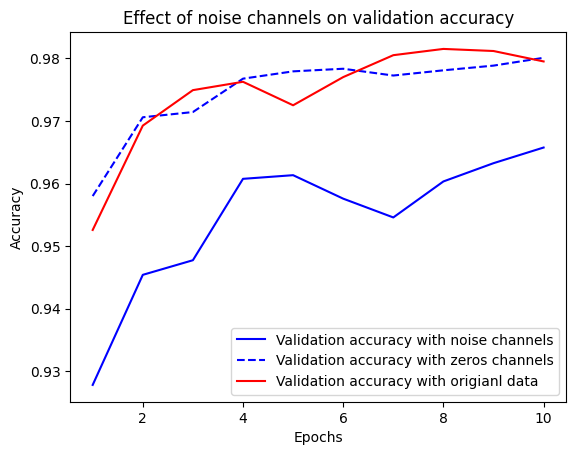

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, 'r',
         label = 'Validation accuracy with origianl data')
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

noisy information을 딥러닝 모델에 넣었을 때 퍼포먼스 하락
feature engineering을 통해 퍼포먼스 향상 가능할 수 있다

딥러닝에서 feature engineering이 필요하지 않다? 일부는 맞는 얘기

딥러닝에서는 모델이 중요한 feature를 스스로 learn, train 가능
하지만 feature engineering을 올바른 방식으로 한다면 더 나은 퍼포먼스를 얻을 수 있음

noisy dataset을 제거하는 게 딥러닝에서 여전히 중요

training 전에 feature selection 

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3145 - accuracy: 0.1048 - val_loss: 2.3040 - val_accuracy: 0.1035
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2986 - accuracy: 0.1160 - val_loss: 2.3125 - val_accuracy: 0.0923
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2907 - accuracy: 0.1271 - val_loss: 2.3129 - val_accuracy: 0.1002
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2795 - accuracy: 0.1373 - val_loss: 2.3282 - val_accuracy: 0.1072
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2632 - accuracy: 0.1526 - val_loss: 2.3368 - val_accuracy: 0.1037
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2437 - accuracy: 0.1665 - val_loss: 2.3475 - val_accuracy: 0.1021
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2193 - accuracy: 0.1829 - val_loss: 2.3631 - val_accuracy: 0.1025

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

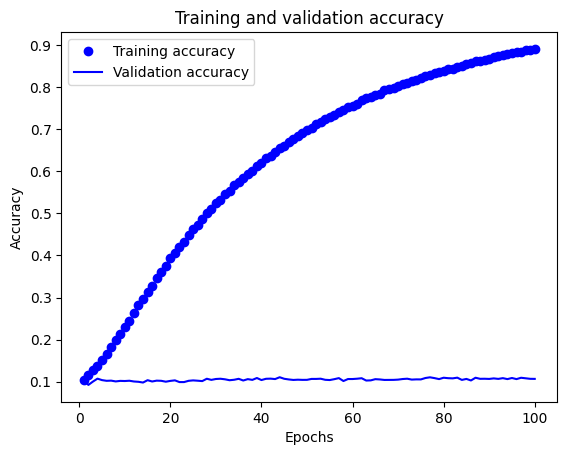

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
train_accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

라벨을 셔플 했음

0~9까지의 라벨을 분류하는 모델이니까 처음 train_accuracy는 0.1 정도

딥러닝에서 어떤 dataset으로도 train 하면 train_accuracy는 always 증가
하지만 val_accuracy를 보고 generalization power를 확인해야함

위의 사례에선 train_accuracy가 0.9정도로 높지만 val_accuracy는 0.1
generalization이 잘 이루어지지 않음

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

##### : 단순하게 데이터의 일정량을 테스트로 떼어 놓는 거

#### K-fold validation
##### 훈련 세트를 K개의 분할로 나눔
##### 각 분할i에 대해 남은 K-1개의 분할로 모델을 훈련하고  i에서 모델을 평가
##### K개의 score 평균

#### Iterated K-fold validation with shuffling
##### K-fold validation을 p번 적용
##### 반복할 때마다, 분할로 나누기 전에 데이터를 무작위로 섞음
##### p*k개의 모델

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## 대표성 있는 데이터

## 시간의 방향

## 데이터 중복

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 347.7529 - accuracy: 0.2961 - val_loss: 2.2622 - val_accuracy: 0.2056
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7854 - accuracy: 0.2140 - val_loss: 2.2213 - val_accuracy: 0.2037
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4348 - accuracy: 0.2220 - val_loss: 2.1541 - val_accuracy: 0.2268
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4347 - accuracy: 0.2168 - val_loss: 2.2402 - val_accuracy: 0.1900
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3063 - accuracy: 0.2117 - val_loss: 2.1269 - val_accuracy: 0.2363
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5278 - accuracy: 0.2196 - val_loss: 2.2822 - val_accuracy: 0.1941
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2901 - accuracy: 0.2305 - val_loss: 3.1798 - val_accuracy: 0.2704
Epoc

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3332 - accuracy: 0.9130 - val_loss: 0.1264 - val_accuracy: 0.9638
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1264 - accuracy: 0.9643 - val_loss: 0.1427 - val_accuracy: 0.9638
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9743 - val_loss: 0.1359 - val_accuracy: 0.9704
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0811 - accuracy: 0.9791 - val_loss: 0.1780 - val_accuracy: 0.9658
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0722 - accuracy: 0.9828 - val_loss: 0.2039 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0662 - accuracy: 0.9837 - val_loss: 0.1777 - val_accuracy: 0.9716
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.9866 - val_loss: 0.2153 - val_accuracy: 0.9709
Epoch 

###적절한 학습률로 훈련을 해야한다

###너무 높으면 안됨

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6672 - accuracy: 0.8367 - val_loss: 0.3592 - val_accuracy: 0.9046
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.9021 - val_loss: 0.3085 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9115 - val_loss: 0.2926 - val_accuracy: 0.9185
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3019 - accuracy: 0.9159 - val_loss: 0.2827 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9187 - val_loss: 0.2776 - val_accuracy: 0.9234
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2860 - accuracy: 0.9201 - val_loss: 0.2740 - val_accuracy: 0.9233
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.9216 - val_loss: 0.2708 - val_accuracy: 0.9259
Epoch 

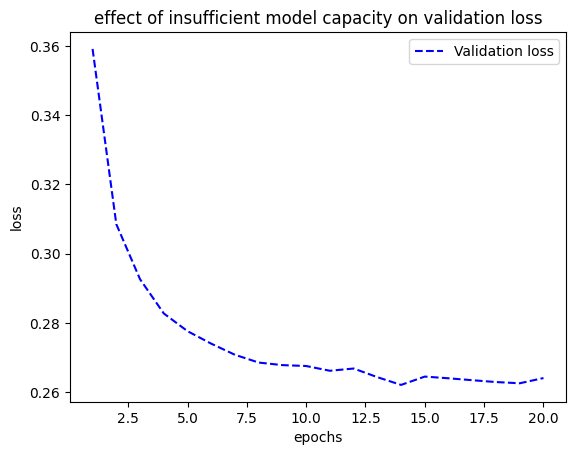

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b--',
         label = 'Validation loss')
plt.title('effect of insufficient model capacity on validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### 오버피팅이 없다

### 모델이 너무 simple

### 용량이 더 큰 모델 필요. 더 많은 정보를 저장할 수 있는 모델

### 층을 추가, 층의 크기 늘리기, 다른 종류의 층 사용

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3669 - accuracy: 0.8973 - val_loss: 0.1942 - val_accuracy: 0.9417
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1671 - accuracy: 0.9510 - val_loss: 0.1374 - val_accuracy: 0.9603
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1183 - accuracy: 0.9644 - val_loss: 0.1182 - val_accuracy: 0.9647
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.9722 - val_loss: 0.1203 - val_accuracy: 0.9629
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9783 - val_loss: 0.0970 - val_accuracy: 0.9723
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0886 - val_accuracy: 0.9738
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0956 - val_accuracy: 0.9739
Epoch 

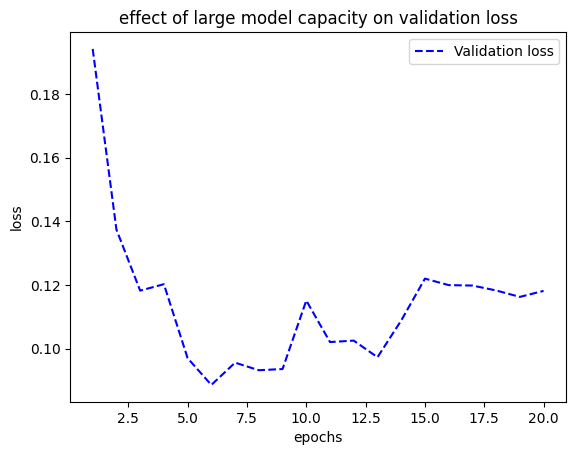

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, val_loss, 'b--',
         label = 'Validation loss')
plt.title('effect of large model capacity on validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

##8 에포크 이후에 과대적합되기 시작함

##larger model이 val loss 도 더 낮음

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 74ms/step - loss: 0.5411 - accuracy: 0.7703 - val_loss: 0.4141 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3382 - accuracy: 0.8903 - val_loss: 0.3228 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2526 - accuracy: 0.9167 - val_loss: 0.2849 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2004 - accuracy: 0.9332 - val_loss: 0.2731 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1683 - accuracy: 0.9429 - val_loss: 0.2754 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1424 - accuracy: 0.9543 - val_loss: 0.2978 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1212 - accuracy: 0.9615 - val_loss: 0.3035 - val_accuracy: 0.8843
Epoch 8/20
30

**Version of the model with lower capacity**

In [2]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 90ms/step - loss: 0.6406 - accuracy: 0.6279 - val_loss: 0.5820 - val_accuracy: 0.7647
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5380 - accuracy: 0.8047 - val_loss: 0.5196 - val_accuracy: 0.8026
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4738 - accuracy: 0.8619 - val_loss: 0.4793 - val_accuracy: 0.8277
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4229 - accuracy: 0.8928 - val_loss: 0.4442 - val_accuracy: 0.8498
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3807 - accuracy: 0.9111 - val_loss: 0.4107 - val_accuracy: 0.8751
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3425 - accuracy: 0.9255 - val_loss: 0.3883 - val_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3078 - accuracy: 0.9353 - val_loss: 0.3695 - val_accuracy: 0.8802
Epoch 8/20
30

**Version of the model with higher capacity**

In [3]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5737 - accuracy: 0.7229 - val_loss: 0.3710 - val_accuracy: 0.8485
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3274 - accuracy: 0.8650 - val_loss: 0.2822 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2341 - accuracy: 0.9092 - val_loss: 0.3260 - val_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1893 - accuracy: 0.9259 - val_loss: 0.4964 - val_accuracy: 0.8175
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1525 - accuracy: 0.9401 - val_loss: 0.2889 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1018 - accuracy: 0.9641 - val_loss: 0.4234 - val_accuracy: 0.8546
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0925 - accuracy: 0.9640 - val_loss: 0.3216 - val_accuracy: 0.8880
Epoch 8/20
30

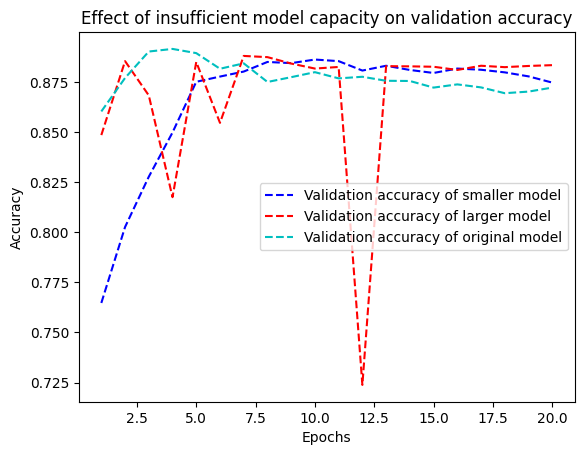

In [4]:
import matplotlib.pyplot as plt
val_acc_small_model = history_smaller_model.history["val_accuracy"]
val_acc_large_model = history_larger_model.history['val_accuracy']
val_acc_original_model = history_original.history['val_accuracy']
epochs = range(1, 21)
plt.plot(epochs, val_acc_small_model, "b--",
         label="Validation accuracy of smaller model")
plt.plot(epochs, val_acc_large_model, "r--",
         label="Validation accuracy of larger model")
plt.plot(epochs, val_acc_original_model, "c--",
         label="Validation accuracy of original model")
plt.title("Effect of insufficient model capacity on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 해석하기 애매하지만 larger model이 일찍 수렴하고 오버피팅이 빨리 됨

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [5]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6501 - accuracy: 0.7392 - val_loss: 0.5158 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4400 - accuracy: 0.8813 - val_loss: 0.4129 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3518 - accuracy: 0.9083 - val_loss: 0.3923 - val_accuracy: 0.8730
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3128 - accuracy: 0.9191 - val_loss: 0.3691 - val_accuracy: 0.8819
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2845 - accuracy: 0.9288 - val_loss: 0.4038 - val_accuracy: 0.8647
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2674 - accuracy: 0.9353 - val_loss: 0.3791 - val_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2527 - accuracy: 0.9416 - val_loss: 0.3622 - val_accuracy: 0.8839
Epoch 8/20
30

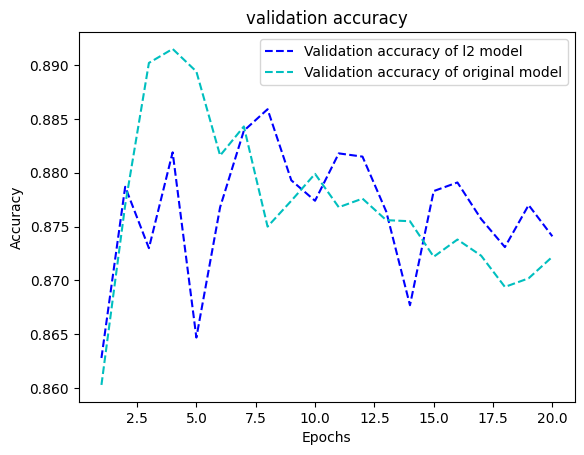

In [7]:
import matplotlib.pyplot as plt
val_acc_l2_model = history_l2_reg.history["val_accuracy"]
val_acc_original_model = history_original.history['val_accuracy']
epochs = range(1, 21)
plt.plot(epochs, val_acc_l2_model, "b--",
         label="Validation accuracy of l2 model")
plt.plot(epochs, val_acc_original_model, "c--",
         label="Validation accuracy of original model")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### L2가 original보다 오버피팅이 덜 됨
### 하지만 여기선 original이 higher accuracy를 갖고 있어서 더 좋음

**Different weight regularizers available in Keras**

In [8]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)                   #L1규제
regularizers.l1_l2(l1=0.001, l2=0.001)   #L1규제와 L2규제 병행  

### 가중치 규제는 일반적으로 작은 딥러닝 모델에서 사용

### 대규모 딥러닝 모델은 파라미터가 너무 많아서 가중치 제약이 모델 용량과 일반화에 큰 영향을 미치지 않을 수 있음 -> 이럴 땐 드롭아웃

#### Adding dropout

**Adding dropout to the IMDB model**

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),                         #드롭 아웃 추가, 일부 벡터가 무작위로 0으로 바뀜. 0.5 -> 0이 될 특성의 비율 
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.6477 - accuracy: 0.6147 - val_loss: 0.5611 - val_accuracy: 0.8418
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5551 - accuracy: 0.7235 - val_loss: 0.4802 - val_accuracy: 0.8645
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4891 - accuracy: 0.7827 - val_loss: 0.4060 - val_accuracy: 0.8691
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4282 - accuracy: 0.8224 - val_loss: 0.3484 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3784 - accuracy: 0.8555 - val_loss: 0.3121 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3366 - accuracy: 0.8833 - val_loss: 0.2878 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3006 - accuracy: 0.9005 - val_loss: 0.2798 - val_accuracy: 0.8908
Epoch 8/20
30

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    
    layers.Dense(16, activation="relu"),
    
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5033 - accuracy: 0.7803 - val_loss: 0.4131 - val_accuracy: 0.8294
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3077 - accuracy: 0.8986 - val_loss: 0.3003 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2300 - accuracy: 0.9247 - val_loss: 0.2897 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1856 - accuracy: 0.9372 - val_loss: 0.2743 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1529 - accuracy: 0.9499 - val_loss: 0.2832 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1301 - accuracy: 0.9563 - val_loss: 0.2945 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1105 - accuracy: 0.9659 - val_loss: 0.3054 - val_accuracy: 0.8849
Epoch 8/20
30

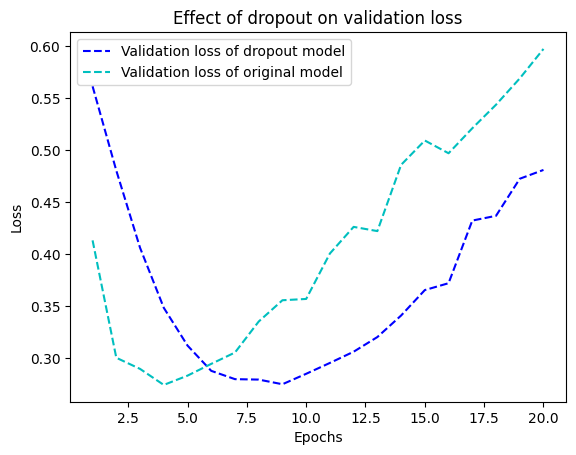

In [11]:
import matplotlib.pyplot as plt
val_loss_dropout_model = history_dropout.history["val_loss"]
val_loss_original_model = history_original.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout_model, "b--",
         label="Validation loss of dropout model")
plt.plot(epochs, val_loss_original_model, "c--",
         label="Validation loss of original model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

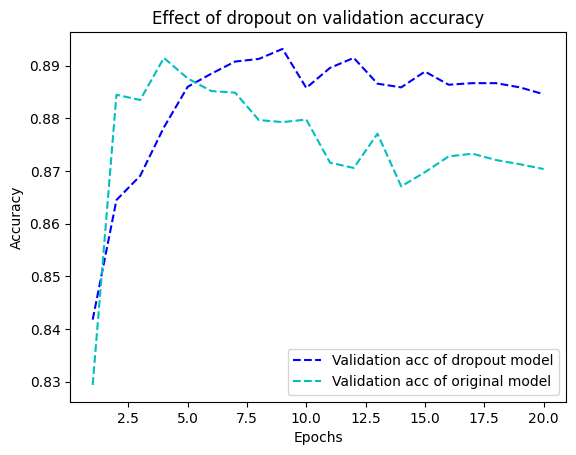

In [12]:
import matplotlib.pyplot as plt
val_loss_dropout_model = history_dropout.history["val_accuracy"]
val_loss_original_model = history_original.history['val_accuracy']
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout_model, "b--",
         label="Validation acc of dropout model")
plt.plot(epochs, val_loss_original_model, "c--",
         label="Validation acc of original model")
plt.title("Effect of dropout on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

accuracy도 중요.

이 그래프가 시사하는 바는 드롭아웃의 효과. 과적합의 지연